In [198]:
from pystac import *
from shapely.geometry import Point, Polygon, mapping
import json
from datetime import datetime

## Initialize

In [199]:
properties = {}

## Identifier


variable: item_id

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/FileName

field: S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514.xemt

notes: take L1D product filename from /CONAE/SAOCOM-1/L1D/data/item_id/Config/parameterFile2.xml' as 'S1<X>_OPER_SAR_EOSSP__CORE_<LLL>_<Orbit>_<DDDDDDDD>T<TTTTTT>'

example: S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514

-----------------------------------------------------

In [200]:
item_id = 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514'
properties['item_id'] = 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514'

## Mission

variable: mission

xpath or method: N/A

field: N/A

notes: HARDCODED

example: saocom-1

-----------------------------------------------------

variable: platform

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/FileName

field: N/A

notes:  from filename under /CONAE/SAOCOM-1/L1D/data/item_id/Data as '<level>-acqId<cccccccccc>-<x>-<mmm>-<hhhhhhhhhh>-<pp>-<r>' extract satellite A/B from -<x>-

example: saocom-1A

-----------------------------------------------------

variable: instruments

xpath or method: /SAOCOM_XMLProduct/Channel/DataSetInfo/SensorName

field: SAO1A

notes: SAR-L

example: SAO1A

-----------------------------------------------------

In [201]:
properties['mission'] = 'saocom-1'
properties['platform'] = 'saocom-1A'
properties['instruments'] = 'SAO1A'

## SAT extension

variable: orbit_state

xpath or method: /SAOCOM_XMLProduct/Channel/StateVectorData/OrbitDirection

field: ASCENDING

notes: N/A

example: ASCENDING

-----------------------------------------------------

variable: absolute_orbit

xpath or method: /SAOCOM_XMLProduct/Channel/StateVectorData/OrbitNumber

field: NOT AVAILABLE

notes: N/A

example: N/A

-----------------------------------------------------

In [202]:
properties['sat:orbit_state'] = 'ASCENDING'
properties['sat:absolute_orbit'] = 'NA'

## VIEW extension

variable: view.incidence_angle

xpath or method: N/A

field: [24.9,48.7]

notes: The incidence angle is the angle between the incident SAR beam and the axis perpendicular to the local geodetic ground surface (from target point of view). It ranges from Near Incidence Angle to Far Incidence Angle. Min incidence angle for TOPSAR Wide Single Pol and Dual Pol: near range 24.9, far range 48.7. Ref: CONAE, Saocom-1 Level 1 Products Format, Jan 2020, Tab.3 Level 1 Products main characteristics

example: [24.9,48.7]

-----------------------------------------------------

variable: view:off_nadir

xpath or method: N/A

field: [15,50]

notes: The off-nadir angle (or look angle) is the angle between the satellite's nadir position and the SAR beam (from instrument point of view). Ref. https://eo.belspo.be/nl/satellites-and-sensors/saocom-1a

example: [15,50]

-----------------------------------------------------

In [203]:
properties['view:incidence_angle'] = [24.9,48.7]
properties['view:off_nadir'] = [15.0,50.0]

## SAR extension

variable: sar:observation_direction

xpath or method: /SAOCOM_XMLProduct/Channel/DataSetInfo/SideLooking

field: RIGHT

notes: Antenna pointing direction, string: as "right" or "left". For KP5 given in capital letters -> e.g. from "RIGHT" to "right"

example: right

-----------------------------------------------------

variable: sar:instrument_mode

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/FileName

field: TOPSAR WIDE

notes: REQUIRED, take filename '<level>-acqId<cccccccccc>-<x>-<mmm>-<hhhhhhhhhh>-<pp>-<r>' and extract <mmm> or <mmmm> "smx" for stripmap x, with x the beam number 1 to 10; "tna" for topsar narrow A; "tnb" for topsar narrow B; "tw" for topsar wide.

example: TW

-----------------------------------------------------

variable: sar:frequency_band

xpath or method: N/A

field: N/A

notes: REQUIRED: HARDCODED

example: L

-----------------------------------------------------

variable: sar:center_frequency

xpath or method: /Auxiliary/Root/RadarFrequency

field: 1275000000

notes: In gigahertz (GHz), multiple the value by 1e-9.

example: 12.75

-----------------------------------------------------

variable: sar:polarizations

xpath or method: /SAOCOM_XMLProduct/Channel/SwathInfo/Polarization

field: V/V V/H

notes: REQUIRED for both single pol images convert V/V and V/H to VV and VH. Same also from filename <pp> field 

example: [VV,VH]

-----------------------------------------------------

variable: sar:product_type

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/FileName

field: gtc

notes: REQUIRED: take filename '<level>-acqId<cccccccccc>-<x>-<mmm>-<hhhhhhhhhh>-<pp>-<r>' and extract <level> from the following options <level>={slc (L1A), di (L1B), gec (L1C), gtc (L1D)} and choose among P=(SSC,MGD,GRD,GEC,GTC,RTC), i.e. P=GTC 

example: GTC

-----------------------------------------------------

In [204]:
properties['sar:observation_direction'] = 'right'
properties['sar:instrument_mode'] = 'TW'
properties['sar:frequency_band'] = 'L'
properties['sar:center_frequency'] = 12.75
properties['sar:polarizations'] = ['VV','VH']
properties['sar:product_type'] = 'GTC'

## Processing Level

variable: proc:level

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/FileName

field: N/A

notes: from sar:product_type <level>={slc (L1A), di (L1B), gec (L1C), gtc (L1D)}

example: L1D

-----------------------------------------------------

In [205]:
properties['processing:level'] = 'L1D'

## Time

variable: datetime

xpath or method: /SAOCOM_XMLProduct/Channel/DataSetInfo/ProcessingDate

field: 19-AUG-2020 21:17:26.613000000000

notes: format to ISO
    
example: 2020-08-19T21:17:26Z

-----------------------------------------------------

variable: start_datetime

xpath or method: /SAOCOM_XMLProduct/Channel/SwathInfo/AcquisitionStartTime

field: 20-AUG-2020 01:25:21.947890000000

notes: format to ISO 

example: 2020-08-20T01:25:21Z

-----------------------------------------------------

variable: end_datetime

xpath or method: N/A

field: N/A

notes: format to ISO

example: N/A

-----------------------------------------------------

In [206]:
properties['datetime'] = '2020-08-19T21:17:26Z'
properties['start_datetime'] = '2020-08-20T01:25:21Z'
#properties['end_datetime'] = ''

## Spatial Information

variable: proj:epsg

xpath or method: /SAOCOM_XMLProduct/Channel/DataSetInfo/ProjectionParameters

field: N/A

notes: Use this field to derive EPSG. E.g. (+proj=utm +zone=52 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +x_0=372414 +y_0=5.41344e+06)->EPSG=32652

example: 32652

-----------------------------------------------------

variable: proj:wkt2

xpath or method: /SAOCOM_XMLProduct/Channel/GroundCornerPoints/XxxXxx, XxxXxx=(NorthWest,NorthEast,SouthWest,SouthEast)

field: N/A

notes: find WKT2 from BBOX

example: N/A

-----------------------------------------------------

In [207]:
properties['proj:epsg'] = 32652
# properties['proj:wkt2'] = ''  ###TBD

## SAR geometry


variable: sar:resolution_range

xpath or method: N/A

field: N/A

notes: Range resolution in meters (m). Ref: CONAE, Saocom-1 Level 1 Products Format, Jan 2020, Tab.3 Level 1 Products main characteristics.

example: 50

-----------------------------------------------------

variable: sar:resolution_azimuth

xpath or method: N/A

field: N/A

notes: Azimuth resolution in meters (m). Ref: CONAE, Saocom-1 Level 1 Products Format, Jan 2020, Tab.3 Level 1 Products main characteristics.

example: 50

-----------------------------------------------------

variable: sar:pixel_spacing_range

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/LinesStep

field: 45.9972638425657

notes: Strongly RECOMMENDED for GRD

example: 45.9972638425657

-----------------------------------------------------

variable: sar:pixel_spacing_azimuth

xpath or method: /SAOCOM_XMLProduct/Channel/RasterInfo/SamplesStep

field: 47.346770920798

notes: Strongly RECOMMENDED for GRD

example: 47.346770920798

-----------------------------------------------------

variable: sar:looks_range

xpath or method: N/A

field: N/A

notes: number of looks perpendicular to the flight path

example: N/A

-----------------------------------------------------

variable: sar:looks_azimuth

xpath or method: N/A

field: N/A

notes: number of looks parallel to the flight path

example: N/A

-----------------------------------------------------

variable: sar:looks_equivalent_number

xpath or method: N/A

field: N/A

notes: The equivalent number of looks (ENL). Ref: CONAE, Saocom-1 Level 1 Products Format, Jan 2020, Tab.3 Level 1 Products main characteristics.

example: 3

-----------------------------------------------------

In [208]:
properties['sar:resolution_range'] = 50
properties['sar:resolution_azimuth'] = 50
properties['sar:pixel_spacing_range'] = 45.9972638425657
properties['sar:pixel_spacing_azimuth'] = 47.3467709207983
#properties['sar:looks_range'] =
#properties['sar:looks_azimuth'] = 
properties['sar:looks_equivalent_number'] = 4.0476193428039551

## GSD

TOPSAR Wide swath mode imagery, 350 km swath width -> 50 m GSD

In [209]:
properties['gsd'] = 50.0

## Image Geometry

Geometry information at: /SAOCOM_XMLProduct/Channel/GroundCornerPoints/XxxXxx, XxxXxx=(NorthWest,NorthEast,SouthWest,SouthEast)
TLGC for Top Left Geodetic Coordinates (and so on). Extract Lon (first point val) Lat (second point val) in deg
```xml
     <GroundCornerPoints>
      <EastingGridSize>0</EastingGridSize>
      <NorthingGridSize>0</NorthingGridSize>
      <NorthWest>
        <Point>
          <val unit="deg">51.3561111111111</val>
          <val unit="deg">123.819444444444</val>
          <val unit="m">0</val>
          <val unit="deg">0</val>
          <val unit="deg">0</val>
        </Point>
      </NorthWest>
      <NorthEast>
        <Point>
          <val unit="deg">51.3561111111111</val>
          <val unit="deg">129.868055555556</val>
          <val unit="m">0</val>
          <val unit="deg">0</val>
          <val unit="deg">0</val>
        </Point>
      </NorthEast>
      <SouthWest>
        <Point>
          <val unit="deg">46.2488888888889</val>
          <val unit="deg">123.819444444444</val>
          <val unit="m">0</val>
          <val unit="deg">0</val>
          <val unit="deg">0</val>
        </Point>
      </SouthWest>
      <SouthEast>
        <Point>
          <val unit="deg">46.2488888888889</val>
          <val unit="deg">129.868055555556</val>
          <val unit="m">0</val>
          <val unit="deg">0</val>
          <val unit="deg">0</val>
        </Point>
      </SouthEast>
      <Center>
        <Point>
          <val unit="deg">2.55361111111111</val>
          <val unit="deg">3.02430555555556</val>
          <val unit="m">0</val>
          <val unit="deg">0</val>
          <val unit="deg">0</val>
        </Point>
      </Center>
    </GroundCornerPoints>
```

In [210]:
TLGC = Point(51.3561111111111, 123.819444444444)
TRGC = Point(51.3561111111111, 129.868055555556)
BRGC = Point(46.2488888888889, 129.868055555556)
BLGC = Point(46.2488888888889, 123.819444444444)
TLGC = Point(51.3561111111111, 123.819444444444)

In [211]:
footprint = Polygon([p.x, p.y] for p in [TLGC, TRGC, BRGC, BLGC, TLGC])

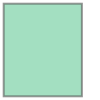

In [212]:
footprint

In [213]:
bbox = list(footprint.bounds)

bbox

[46.2488888888889, 123.819444444444, 51.3561111111111, 129.868055555556]

In [214]:
geometry = mapping(footprint)

geometry

{'type': 'Polygon',
 'coordinates': (((51.3561111111111, 123.819444444444),
   (51.3561111111111, 129.868055555556),
   (46.2488888888889, 129.868055555556),
   (46.2488888888889, 123.819444444444),
   (51.3561111111111, 123.819444444444)),)}

## Item

In [215]:
item = Item(id=item_id, 
           geometry=mapping(footprint),
           bbox=bbox,
           datetime=datetime.strptime(properties['datetime'], '%Y-%m-%dT%H:%M:%SZ'),
           properties=properties,
           stac_extensions=['eo', 'sat', 'proj', 'sar', 'processing', 'view'])

In [216]:
item

<Item id=S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514>

In [217]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
 'properties': {'item_id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
  'mission': 'saocom-1',
  'platform': 'saocom-1A',
  'instruments': 'SAO1A',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': 'NA',
  'view:incidence_angle': [24.9, 48.7],
  'view:off_nadir': [15.0, 50.0],
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'TW',
  'sar:frequency_band': 'L',
  'sar:center_frequency': 12.75,
  'sar:polarizations': ['VV', 'VH'],
  'sar:product_type': 'GTC',
  'processing:level': 'L1D',
  'datetime': '2020-08-19T21:17:26Z',
  'start_datetime': '2020-08-20T01:25:21Z',
  'proj:epsg': 32652,
  'sar:resolution_range': 50,
  'sar:resolution_azimuth': 50,
  'sar:pixel_spacing_range': 45.9972638425657,
  'sar:pixel_spacing_azimuth': 47.3467709207983,
  'sar:looks_equivalent_number': 4.047619342803955,
  'gsd': 50.0},
 'geometry': {'type': 'Polygon',


# Import STAC asset with data roles for dual pol L1D data as single-band geotiff

In [218]:
asset = Asset(href='./Data/{}'.format('gtc-acqId0000211284-a-tw--0000000000-vh-m'),
              media_type=MediaType.GEOTIFF,
              roles=['data'])

In [219]:
asset.to_dict()

{'href': './Data/gtc-acqId0000211284-a-tw--0000000000-vh-m',
 'type': 'image/tiff; application=geotiff',
 'roles': ['data']}

In [220]:
item.add_asset(key='data_vh', asset=asset)

<Item id=S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514>

In [221]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
 'properties': {'item_id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
  'mission': 'saocom-1',
  'platform': 'saocom-1A',
  'instruments': 'SAO1A',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': 'NA',
  'view:incidence_angle': [24.9, 48.7],
  'view:off_nadir': [15.0, 50.0],
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'TW',
  'sar:frequency_band': 'L',
  'sar:center_frequency': 12.75,
  'sar:polarizations': ['VV', 'VH'],
  'sar:product_type': 'GTC',
  'processing:level': 'L1D',
  'datetime': '2020-08-19T21:17:26Z',
  'start_datetime': '2020-08-20T01:25:21Z',
  'proj:epsg': 32652,
  'sar:resolution_range': 50,
  'sar:resolution_azimuth': 50,
  'sar:pixel_spacing_range': 45.9972638425657,
  'sar:pixel_spacing_azimuth': 47.3467709207983,
  'sar:looks_equivalent_number': 4.047619342803955,
  'gsd': 50.0},
 'geometry': {'type': 'Polygon',


In [222]:
asset = Asset(href='./Data/{}'.format('gtc-acqId0000211284-a-tw--0000000000-vv-m'),
              media_type=MediaType.GEOTIFF,
              roles=['data'])

In [223]:
asset.to_dict()

{'href': './Data/gtc-acqId0000211284-a-tw--0000000000-vv-m',
 'type': 'image/tiff; application=geotiff',
 'roles': ['data']}

In [224]:
item.add_asset(key='data_vv', asset=asset)

<Item id=S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514>

In [225]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
 'properties': {'item_id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
  'mission': 'saocom-1',
  'platform': 'saocom-1A',
  'instruments': 'SAO1A',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': 'NA',
  'view:incidence_angle': [24.9, 48.7],
  'view:off_nadir': [15.0, 50.0],
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'TW',
  'sar:frequency_band': 'L',
  'sar:center_frequency': 12.75,
  'sar:polarizations': ['VV', 'VH'],
  'sar:product_type': 'GTC',
  'processing:level': 'L1D',
  'datetime': '2020-08-19T21:17:26Z',
  'start_datetime': '2020-08-20T01:25:21Z',
  'proj:epsg': 32652,
  'sar:resolution_range': 50,
  'sar:resolution_azimuth': 50,
  'sar:pixel_spacing_range': 45.9972638425657,
  'sar:pixel_spacing_azimuth': 47.3467709207983,
  'sar:looks_equivalent_number': 4.047619342803955,
  'gsd': 50.0},
 'geometry': {'type': 'Polygon',


# Import STAC assets for product metadata

In [226]:
item.add_asset(key='metadata_vh', asset=Asset(href='./Data/{}'.format('gtc-acqId0000211284-a-tw--0000000000-vh-m.xml'),
              media_type=MediaType.XML,
              roles=['metadata']))

<Item id=S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514>

In [227]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
 'properties': {'item_id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
  'mission': 'saocom-1',
  'platform': 'saocom-1A',
  'instruments': 'SAO1A',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': 'NA',
  'view:incidence_angle': [24.9, 48.7],
  'view:off_nadir': [15.0, 50.0],
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'TW',
  'sar:frequency_band': 'L',
  'sar:center_frequency': 12.75,
  'sar:polarizations': ['VV', 'VH'],
  'sar:product_type': 'GTC',
  'processing:level': 'L1D',
  'datetime': '2020-08-19T21:17:26Z',
  'start_datetime': '2020-08-20T01:25:21Z',
  'proj:epsg': 32652,
  'sar:resolution_range': 50,
  'sar:resolution_azimuth': 50,
  'sar:pixel_spacing_range': 45.9972638425657,
  'sar:pixel_spacing_azimuth': 47.3467709207983,
  'sar:looks_equivalent_number': 4.047619342803955,
  'gsd': 50.0},
 'geometry': {'type': 'Polygon',


In [228]:
item.add_asset(key='metadata_vv', asset=Asset(href='./Data/{}'.format('gtc-acqId0000211284-a-tw--0000000000-vv-m.xml'),
              media_type=MediaType.XML,
              roles=['metadata']))

<Item id=S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514>

In [229]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
 'properties': {'item_id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
  'mission': 'saocom-1',
  'platform': 'saocom-1A',
  'instruments': 'SAO1A',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': 'NA',
  'view:incidence_angle': [24.9, 48.7],
  'view:off_nadir': [15.0, 50.0],
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'TW',
  'sar:frequency_band': 'L',
  'sar:center_frequency': 12.75,
  'sar:polarizations': ['VV', 'VH'],
  'sar:product_type': 'GTC',
  'processing:level': 'L1D',
  'datetime': '2020-08-19T21:17:26Z',
  'start_datetime': '2020-08-20T01:25:21Z',
  'proj:epsg': 32652,
  'sar:resolution_range': 50,
  'sar:resolution_azimuth': 50,
  'sar:pixel_spacing_range': 45.9972638425657,
  'sar:pixel_spacing_azimuth': 47.3467709207983,
  'sar:looks_equivalent_number': 4.047619342803955,
  'gsd': 50.0},
 'geometry': {'type': 'Polygon',


In [230]:
item.add_asset(key='overview', asset=Asset(href='./Images/{}'.format('gtc-acqId0000211284-a-tw--0000000000-m.png'),
              media_type=MediaType.PNG,
              roles=['overview']))

<Item id=S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514>

In [231]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
 'properties': {'item_id': 'S1A_OPER_SAR_EOSSP__CORE_L1D_OLVF_20200819T231514',
  'mission': 'saocom-1',
  'platform': 'saocom-1A',
  'instruments': 'SAO1A',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': 'NA',
  'view:incidence_angle': [24.9, 48.7],
  'view:off_nadir': [15.0, 50.0],
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'TW',
  'sar:frequency_band': 'L',
  'sar:center_frequency': 12.75,
  'sar:polarizations': ['VV', 'VH'],
  'sar:product_type': 'GTC',
  'processing:level': 'L1D',
  'datetime': '2020-08-19T21:17:26Z',
  'start_datetime': '2020-08-20T01:25:21Z',
  'proj:epsg': 32652,
  'sar:resolution_range': 50,
  'sar:resolution_azimuth': 50,
  'sar:pixel_spacing_range': 45.9972638425657,
  'sar:pixel_spacing_azimuth': 47.3467709207983,
  'sar:looks_equivalent_number': 4.047619342803955,
  'gsd': 50.0},
 'geometry': {'type': 'Polygon',


In [232]:
write_file(item, include_self_link=True, dest_href=f'MetadataExtractorsTests_{item.id}.json')